In [1]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importa os dados do arquivo CSV e monta o DataFrame com a Base de Dados
#Estatísticas de segurança: série histórica mensal por área de delegacia desde 01/2003
dfBD = pd.read_csv("https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv", sep= ";", encoding="latin1")
dfBD.head(2)

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,21,2,0,0,0,0,578,3
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,15,6,0,1,0,0,441,3


In [3]:
#####################################################################################################
# Hoje, após sucessivas leis estaduais, e com a promulgação da Constituição do Estado do Rio de Janeiro em 1998
# , a RMRJ possui 22 municípios: Belford Roxo, Cachoeiras de Macacu, Duque de Caxias, Guapimirim, Itaboraí
# , Itaguaí, Japeri, Magé, Maricá, Mesquita, Nilópolis, Niterói, Nova Iguaçu, Paracambi, Petrópolis, Queimados
# , Rio Bonito, Rio de Janeiro, São Gonçalo, São João de Meriti, Seropédica e Tanguá
# FONTE: https://www.rj.gov.br/irm/formacao_rjrm
#####################################################################################################

#Cria um database somente com os dados da região Metropolitana
regMetropolitana = ["Rio de Janeiro", "Niterói", "Belford Roxo", "Cachoeiras de Macacu", "Duque de Caxias", "Guapimirim", "Itaboraí",
                    "Itaguaí", "Japeri", "Magé", "Maricá", "Mesquita", "Nilópolis", "Nova Iguaçu", "Paracambi", "Petrópolis",
                    "Queimados", "Rio Bonito", "Seropédica", "São Gonçalo", "São João de Meriti", "Tanguá"]

#Filtra a base com os dados da região metropolitana
dfBDRegMetropolitana = dfBD.loc[dfBD["munic"].isin(regMetropolitana)]
dfBDRegMetropolitana

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,21,2,0,0,0,0,578,3
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,15,6,0,1,0,0,441,3
2,5,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,47,2,1,0,0,0,637,3
3,6,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,6,...,NaN,NaN,26,2,1,0,0,0,473,3
4,7,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,4,...,NaN,NaN,10,1,3,0,0,0,147,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36563,82,8,2025,2025m08,12,4,Maricá,3302700,Grande NiterÃ³i,0,...,8.0,1.0,125,11,0,0,0,0,1202,2
36579,105,8,2025,2025m08,26,7,Petrópolis,3303906,Interior,2,...,10.0,0.0,79,4,1,0,0,0,812,2
36580,106,8,2025,2025m08,26,7,Petrópolis,3303906,Interior,0,...,9.0,0.0,35,1,1,0,0,0,386,2
36588,119,8,2025,2025m08,35,4,Rio Bonito,3304300,Interior,0,...,9.0,0.0,19,0,0,0,0,0,207,2


In [4]:
#Crio a Base de Dados com os dois primeiros anos da gestão anterior
dfBDGestaoAnterior = dfBDRegMetropolitana.loc[(dfBD["ano"] == 2019) | (dfBD["ano"] == 2020)]
dfBDGestaoAnterior

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
25669,1,1,2019,2019m01,5,1,Rio de Janeiro,3304557,Capital,0,...,8.0,1.0,11,1,0,0,0,0,572,3
25670,4,1,2019,2019m01,5,1,Rio de Janeiro,3304557,Capital,1,...,15.0,10.0,12,2,1,0,0,0,625,3
25671,5,1,2019,2019m01,5,1,Rio de Janeiro,3304557,Capital,0,...,30.0,18.0,29,3,0,0,0,0,1095,3
25672,6,1,2019,2019m01,4,1,Rio de Janeiro,3304557,Capital,3,...,9.0,2.0,33,3,0,0,0,0,575,3
25673,7,1,2019,2019m01,5,1,Rio de Janeiro,3304557,Capital,1,...,0.0,0.0,9,0,0,0,0,0,147,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28891,82,12,2020,2020m12,12,4,Maricá,3302700,Grande NiterÃ³i,10,...,7.0,0.0,49,8,0,0,0,0,537,3
28907,105,12,2020,2020m12,26,7,Petrópolis,3303906,Interior,3,...,37.0,0.0,75,1,1,0,0,0,510,3
28908,106,12,2020,2020m12,26,7,Petrópolis,3303906,Interior,1,...,7.0,0.0,18,0,0,0,0,0,166,3
28916,119,12,2020,2020m12,35,4,Rio Bonito,3304300,Interior,0,...,5.0,1.0,17,1,0,0,0,0,124,3


In [5]:
#Crio a Base de Dados com os dois primeiros anos da gestão atual
dfBDGestaoAtual = dfBDRegMetropolitana.loc[(dfBD["ano"] == 2023) | (dfBD["ano"] == 2024)]
dfBDGestaoAtual

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
32245,1,1,2023,2023m01,5,1,Rio de Janeiro,3304557,Capital,0,...,5.0,0.0,12,2,0,0,0,0,772,3
32246,4,1,2023,2023m01,5,1,Rio de Janeiro,3304557,Capital,0,...,9.0,1.0,14,4,0,0,0,0,614,3
32247,5,1,2023,2023m01,5,1,Rio de Janeiro,3304557,Capital,1,...,14.0,1.0,30,4,0,0,0,0,1258,3
32248,6,1,2023,2023m01,4,1,Rio de Janeiro,3304557,Capital,2,...,2.0,2.0,19,3,0,0,0,0,360,3
32249,7,1,2023,2023m01,5,1,Rio de Janeiro,3304557,Capital,1,...,0.0,1.0,18,1,0,0,0,0,232,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35467,82,12,2024,2024m12,12,4,Maricá,3302700,Grande NiterÃ³i,2,...,11.0,0.0,115,5,0,0,0,0,1076,3
35483,105,12,2024,2024m12,26,7,Petrópolis,3303906,Interior,0,...,11.0,0.0,75,3,0,0,0,0,782,3
35484,106,12,2024,2024m12,26,7,Petrópolis,3303906,Interior,0,...,7.0,1.0,42,3,0,0,0,0,354,3
35492,119,12,2024,2024m12,35,4,Rio Bonito,3304300,Interior,1,...,0.0,0.0,20,0,0,0,0,0,178,3


In [6]:
#Somo os casos de estelionato (estelionato) por delegacia (cisp) da gestão anterior
dbEstelionatoGestaoAnterior = dfBDGestaoAnterior.groupby("cisp")["estelionato"].sum().reset_index()
dbEstelionatoGestaoAnterior.head(2)

,cisp,estelionato
0,1,2560
1,4,417


In [7]:
#Somo os casos de estelionato (estelionato) por delegacia (cisp) da gestão atual
dbEstelionatoGestaoAtual = dfBDGestaoAtual.groupby("cisp")["estelionato"].sum().reset_index()
dbEstelionatoGestaoAtual.head(2)

,cisp,estelionato
0,1,2146
1,4,1010


In [8]:
#Cria o array com os casos de estelionato da gestão anterior
arrayEstelionatoGestaoAnterior = np.array(dbEstelionatoGestaoAnterior["estelionato"])
arrayEstelionatoGestaoAnterior

array([2560,  417, 1788,  706,  114, 1928, 1974,  185, 1551, 1280, 1730,
        736, 3054,  593,  853, 1630, 1457, 1583,  875,  841,  479,  406,
       1047, 1361,  642, 1630,  633,  696, 2671, 1767, 2375, 3592, 1821,
       1405,  820,  579,  707, 1121, 1577,  419,  508,  266,  391,  174,
       1433,  588,  988,  560,  683,  979,  686, 2269,  521,  139,  387,
        101, 2242,  233,  479,  118,   45,  663, 1004,  599,  925,  395,
       1345, 1145,  612,  282,  413,  684, 1083,  223,  124,  151])

In [9]:
#Cria o array com os casos de estelionato da gestão atual
arrayEstelionatoGestaoAtual = np.array(dbEstelionatoGestaoAtual["estelionato"])
arrayEstelionatoGestaoAtual

array([ 2146,  1010,  3011,  1527,   753,  3763,  3450,   380,  4718,
        2661,  4142,  3029,  9665,  1336,  2080,  4676,  2898,  4500,
        3426,  1860,  2422,  2114,  2155,  3169,  2855,  4256,  2544,
        2008,  9529,  3559,  5442, 10026,  3830,  3109,  2145,  2481,
        1797,  3475,  6433,  2144,  1823,   938,  1635,   507,  3250,
        1993,  4981,  1620,  2224,  2211,  3266,  4077,  2278,   651,
        1648,   443,  5797,   833,  1513,   811,   267,  2402,  2755,
        1927,  1956,  1729,  3768,  3923,  1502,  1032,  1532,  3498,
        3310,  1466,   501,   458])

In [10]:
#Cálculos estatísticos da gestão anterior
mediaGestaoAnterior = np.mean(arrayEstelionatoGestaoAnterior)
medianaGestaoAnterior = np.median(arrayEstelionatoGestaoAnterior)
q1GestaoAnterior = np.percentile(arrayEstelionatoGestaoAnterior, 25)
q2GestaoAnterior = np.percentile(arrayEstelionatoGestaoAnterior, 50)
q3GestaoAnterior = np.percentile(arrayEstelionatoGestaoAnterior, 75)
distanciaGestaoAnterior = (mediaGestaoAnterior - medianaGestaoAnterior) / medianaGestaoAnterior
iqrGestaoAnterior = q3GestaoAnterior - q1GestaoAnterior
limSupGestaoAnterior = q3GestaoAnterior + (1.5 * iqrGestaoAnterior)
limInfGestaoAnterior = q1GestaoAnterior - (1.5 * iqrGestaoAnterior)

#Cálculos estatísticos da gestão atual
mediaGestaoAtual = np.mean(arrayEstelionatoGestaoAtual)
medianaGestaoAtual = np.median(arrayEstelionatoGestaoAtual)
q1GestaoAtual = np.percentile(arrayEstelionatoGestaoAtual, 25)
q2GestaoAtual = np.percentile(arrayEstelionatoGestaoAtual, 50)
q3GestaoAtual = np.percentile(arrayEstelionatoGestaoAtual, 75)
distanciaGestaoAtual = (mediaGestaoAtual - medianaGestaoAtual) / medianaGestaoAtual
iqrGestaoAtual = q3GestaoAtual - q1GestaoAtual
limSupGestaoAtual = q3GestaoAtual + (1.5 * iqrGestaoAtual)
limInfGestaoAtual = q1GestaoAtual - (1.5 * iqrGestaoAtual)

In [11]:
#Imprime os valores estatísticos calculados
print('Gestão ANTERIOR ********************************************')
print(f'Média gestão anterior     = {mediaGestaoAnterior:.2f}')
print(f'Mediana gestão anterior   = {medianaGestaoAnterior:.2f}')
print(f'Q1 gestão anterior        = {q1GestaoAnterior:.2f}')
print(f'Q2 gestão anterior        = {q2GestaoAnterior:.2f}')
print(f'Q3 gestão anterior        = {q3GestaoAnterior:.2f}')
print(f'Distância gestão anterior = {distanciaGestaoAnterior * 100:.2f} %')       #Em percentual
print(f'Lim. Sup. gestão anterior = {limSupGestaoAnterior:.2f}')
print(f'Lim. Inf. gestão anterior = {limInfGestaoAnterior:.2f}')
print('\nGestão ATUAL ***********************************************')
print(f'Média gestão atual     = {mediaGestaoAtual:.2f}')
print(f'Mediana gestão atual   = {medianaGestaoAtual:.2f}')
print(f'Q1 gestão atual        = {q1GestaoAtual:.2f}')
print(f'Q2 gestão atual        = {q2GestaoAtual:.2f}')
print(f'Q3 gestão atual        = {q3GestaoAtual:.2f}')
print(f'Distância gestão atual = {distanciaGestaoAtual * 100:.2f} %')       #Em percentual
print(f'Lim. Sup. gestão atual = {limSupGestaoAtual:.2f}')
print(f'Lim. Inf. gestão atual = {limInfGestaoAtual:.2f}')

Gestão ANTERIOR ********************************************
Média gestão anterior     = 987.38
Mediana gestão anterior   = 706.50
Q1 gestão anterior        = 418.50
Q2 gestão anterior        = 706.50
Q3 gestão anterior        = 1439.00
Distância gestão anterior = 39.76 %
Lim. Sup. gestão anterior = 2969.75
Lim. Inf. gestão anterior = -1112.25

Gestão ATUAL ***********************************************
Média gestão atual     = 2776.96
Mediana gestão atual   = 2251.00
Q1 gestão atual        = 1598.00
Q2 gestão atual        = 2251.00
Q3 gestão atual        = 3480.75
Distância gestão atual = 23.37 %
Lim. Sup. gestão atual = 6304.88
Lim. Inf. gestão atual = -1226.12


In [12]:
#Delegacias da gestão anterior e atual que representam os OUTLIERS com MAIOR número de estelionatos
dbMaioresOutliersGestAnterior = dbEstelionatoGestaoAnterior.loc[dbEstelionatoGestaoAnterior["estelionato"] >= limSupGestaoAnterior]
dbMaioresOutliersGestAtual = dbEstelionatoGestaoAtual.loc[dbEstelionatoGestaoAtual["estelionato"] >= limSupGestaoAtual]

#Delegacias da gestão anterior e atual que representam os OUTLIERS com MENOR número de estelionatos
dbMenoresOutliersGestAnterior = dbEstelionatoGestaoAnterior.loc[dbEstelionatoGestaoAnterior["estelionato"] <= limInfGestaoAnterior]
dbMenoresOutliersGestAtual = dbEstelionatoGestaoAtual.loc[dbEstelionatoGestaoAtual["estelionato"] <= limInfGestaoAtual]

In [13]:
#Imprime os resultados das delegacias que extrapolaram o LIMITE SUPERIOR na gestão anterior
dbMaioresOutliersGestAnterior

,cisp,estelionato
12,16,3054
31,35,3592


In [14]:
#Imprime os resultados das delegacias que extrapolaram o LIMITE SUPERIOR na gestão atual
dbMaioresOutliersGestAtual

,cisp,estelionato
12,16,9665
28,32,9529
31,35,10026
38,42,6433


In [15]:
#Imprime os resultados das delegacias que extrapolaram o LIMITE INFERIOR na gestão anterior
dbMenoresOutliersGestAnterior

,cisp,estelionato


In [16]:
#Imprime os resultados das delegacias que extrapolaram o LIMITE INFERIOR na gestão atual
dbMenoresOutliersGestAtual

,cisp,estelionato


In [41]:
##########################################################################################################################
# 1)
# Compare os outliers dos dois primeiros anos da atual gestão com os dois primeiros anos da gestão anterior no que diz
# respeito a estelionato na região metropolitana. O padrão se manteve?
# RESPOSTA:
#  A quantidade de delegacias acima do LIMITE SUPERIOR duplicou, passou de 2 para 4, e os casos de estelionato da
#  gestão atual é que aumentaram muito em relação a gestão anterior.
#
# 2)
# Alguma delegacia deixou de ser outlier?
# RESPOSTA:
#  Não, nenhuma delegacia deixou de ser OUTLIER em relação à gestão anterior.
#
# 3)
# Alguma delegacia passou a ser considerada outlier que anteriormente não era?
# RESPOSTA:
#  Sim, duas delegacias (32 e 42) passaram a ser consideradas OUTLIERs em relação à gestão anterior.
########################################################################################################################

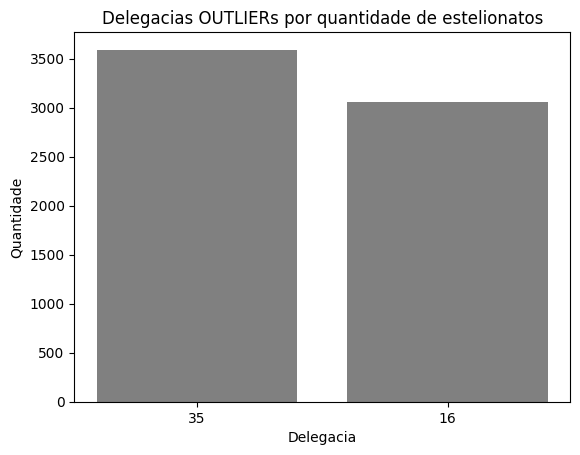

In [ ]:
#########################################################################################################
#GESTÃO ANTERIOR
#########################################################################################################

#Ordeno os dados
dbMaioresOutliersGestAnterior = dbMaioresOutliersGestAnterior.sort_values('estelionato', ascending=False)

#Transformo a coluna cisp de INT para STRING
dbMaioresOutliersGestAnterior['cisp'] = dbMaioresOutliersGestAnterior['cisp'].astype(str)

#Gero o gráfico
delegacias = dbMaioresOutliersGestAnterior['cisp']
qtdeEstelionato = dbMaioresOutliersGestAnterior['estelionato']

plt.bar(delegacias, qtdeEstelionato, color='gray')
plt.title('Delegacias OUTLIERs por quantidade de estelionatos')
plt.xlabel('Delegacia')
plt.ylabel('Quantidade')
plt.grid(False)
plt.show()


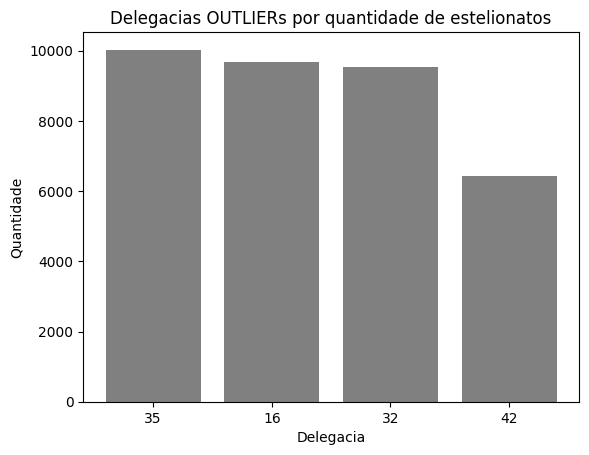

In [19]:
#########################################################################################################
#GESTÃO ATUAL
#########################################################################################################

#Ordeno os dados
dbMaioresOutliersGestAtual = dbMaioresOutliersGestAtual.sort_values('estelionato', ascending=False)

#Transformo a coluna cisp de INT para STRING
dbMaioresOutliersGestAtual['cisp'] = dbMaioresOutliersGestAtual['cisp'].astype(str)

#Gero o gráfico
delegacias = dbMaioresOutliersGestAtual['cisp']
qtdeEstelionato = dbMaioresOutliersGestAtual['estelionato']

plt.bar(delegacias, qtdeEstelionato, color='gray')
plt.title('Delegacias OUTLIERs por quantidade de estelionatos')
plt.xlabel('Delegacia')
plt.ylabel('Quantidade')
plt.grid(False)
plt.show()
